In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../')
from functions import gpt

In [2]:
model = 'gpt-4'

In [3]:
# - I want the x, y coordinates of the 2 functions to fit the same plot as closely as possible
# - I want x to be between 0 and 10
# - I need the full dataset with 10 points per function
# - Create a unique name for the first 2 functions that is based on the type of math that is used. Use that name as the key for the data.
#     - for the 3rd dataset use the name 'Sample'.

In [4]:
system_prompt = """You are an expert mathematician and data scientist.
    - The data is for hypothetical daily COVID-19 new case counts 
    - I want to generate a dataset as input for a function
    - I need the full dataset with 10 points
    - Please format your response in JSON. You only speak JSON. Do not write text that isn't JSON.
"""

In [5]:
text = """
ΔC𝑛/ΔC𝑛−1
"""

In [6]:
step_1_response = gpt.chat_create(system_prompt, text, model, output_json=True)

In [7]:
step_1_response

{'dataset': [{'day': 1, 'new_cases': 100},
  {'day': 2, 'new_cases': 120},
  {'day': 3, 'new_cases': 150},
  {'day': 4, 'new_cases': 180},
  {'day': 5, 'new_cases': 220},
  {'day': 6, 'new_cases': 260},
  {'day': 7, 'new_cases': 300},
  {'day': 8, 'new_cases': 350},
  {'day': 9, 'new_cases': 400},
  {'day': 10, 'new_cases': 450}]}

In [8]:
# step_1_response = {'dataset': [{'day': 1, 'new_cases': 100},
#   {'day': 2, 'new_cases': 120},
#   {'day': 3, 'new_cases': 150},
#   {'day': 4, 'new_cases': 180},
#   {'day': 5, 'new_cases': 210},
#   {'day': 6, 'new_cases': 240},
#   {'day': 7, 'new_cases': 270},
#   {'day': 8, 'new_cases': 300},
#   {'day': 9, 'new_cases': 330},
#   {'day': 10, 'new_cases': 360}]}

In [9]:
system_prompt = """You are an expert mathematician and data scientist.
- Please generate python code using matplotlib to visualize the provided dataset
- Please format your response in the python coding language. You only speak python. Do not write text that isn't python.
- Do not include any comments in your code.
- Do not include the dataset in your response. Only include the code needed to create the plot. 
- The dataset variable name will be step_1_response.
- Check your work and make that the dataset loads into the dataframe or whatever structure that your code requires.
- Check the first key in the dataset
"""

In [10]:
step_2_response = gpt.chat_create(system_prompt, json.dumps(step_1_response), model, output_json=False)

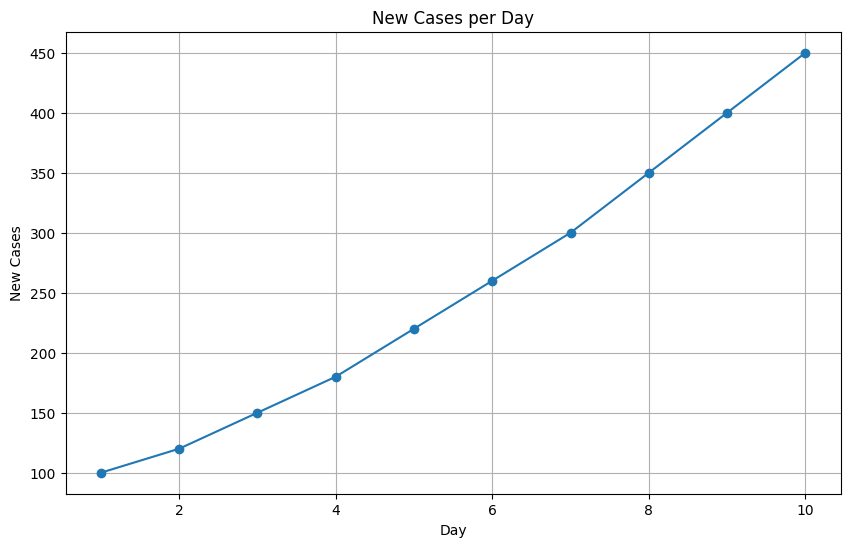

In [11]:
exec(step_2_response)

In [12]:
system_prompt = f"""You are an expert mathematician and data scientist.
- Given the provided dataset, generate a new one that closely mirrors it, 
    but with y values that are randomly greater than or less than the y values.
- I want x to be between 0 and 10
- I need the full dataset with 10 points per function
- Please format your response in JSON. You only speak JSON. Do not write text that isn't JSON.
- Do not include any comments in your response.
"""

# - Use the name 'Sample' for the returned dataset.

In [13]:
# step_3_response = gpt.chat_create(system_prompt, json.dumps(step_1_response), model, output_json=True)

In [14]:
# step_3_response